In [3]:
library(CausalImpact)
library(ggplot2)
library(missForest)
library(zoo)
library(gridExtra)
library(xts)
t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)

Loading required package: bsts

Loading required package: BoomSpikeSlab

Loading required package: Boom


Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: xts


Attaching package: ‘bsts’


The following object is masked from ‘package:BoomSpikeSlab’:

    SuggestBurn




### Read Data

In [16]:
require("reticulate")
source_python("pickle_reader.py")

# Pixels where there was a significant change in land cover in 1994
# ndvi_1994_mean <- read_pickle_file("../manuscript/outputs/ndvi_changed_mean_1994")
ndvi_1994_data <- read_pickle_file("../manuscript/outputs/ndvi_1994_data")
lai_1994_data <- read_pickle_file("../manuscript/outputs/lai_1994_data")

### Implement causal analyses on every NDVI trend in disturbed pixels

In [17]:
set.seed(123)
results_ndvi=matrix(,nrow=length(ndvi_1994_data),ncol=5)
y_ndvi=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))
X_ndvi=matrix(NA,nrow=30,ncol=length(ndvi_1994_data))

for(k in 1:length(ndvi_1994_data)){
# for(k in 1:5){
    print(k)
    flush.console()
    tryCatch({
        data=ndvi_1994_data[k]
        data<-matrix(unlist(data),nrow=30)
        # all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
        # t_na_rm = t[all_columns_na==FALSE]
        # data_na_rm = data[all_columns_na==FALSE,]
        imputed_data<-missForest(data)
        imputed_data<-imputed_data[1]$ximp

        # data_ts <- zoo(imputed_data, t)
        # ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
        y_ndvi[,k] <- imputed_data[,1]
        X_ndvi[,k] = rowMeans(imputed_data[,2:dim(imputed_data)[2]],1)
        data_ts_ave = zoo(cbind(y[,k],X[,k]),t)
        pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
        post.period <- as.Date(c("1994-07-01", "2013-07-01"))
        impact <- CausalImpact(data_ts_ave, pre.period, post.period)
        # impact2 <- CausalImpact(data_ts, pre.period, post.period)

        results_ndvi[k,1] = impact$summary$Actual[1]
        results_ndvi[k,2] = impact$summary$Pred[1]
        results_ndvi[k,3] = impact$summary$AbsEffect[1]
        results_ndvi[k,4] = impact$summary$RelEffect[1]
        results_ndvi[k,5] = impact$summary$p[1]},
        
    error=function(err){return(NA)})
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 207


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 208
[1] 209


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 210


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 211


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 212
[1] 213
[1] 214
[1] 215
[1] 216
[1] 217
[1] 218
[1] 219


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 220
[1] 221
[1] 222


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 223


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 224
[1] 225


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 226


Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“invalid mtry: reset to within valid range”
Warning message in max(ncat):
“no non-missing arguments to max; returning -Inf”
Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
“NAs introduced by coercion to integer range”


[1] 227
[1] 228
[1] 229
[1] 230
[1] 231
[1] 232
[1] 233
[1] 234
[1] 235
[1] 236
[1] 237
[1] 238
[1] 239
[1] 240
[1] 241
[1] 242
[1] 243
[1] 244
[1] 245
[1] 246
[1] 247
[1] 248
[1] 249
[1] 250
[1] 251
[1] 252
[1] 253
[1] 254
[1] 255
[1] 256
[1] 257
[1] 258
[1] 259
[1] 260
[1] 261
[1] 262
[1] 263
[1] 264
[1] 265
[1] 266
[1] 267
[1] 268
[1] 269
[1] 270
[1] 271
[1] 272
[1] 273
[1] 274
[1] 275
[1] 276
[1] 277
[1] 278
[1] 279
[1] 280
[1] 281
[1] 282
[1] 283
[1] 284
[1] 285
[1] 286
[1] 287
[1] 288
[1] 289
[1] 290
[1] 291
[1] 292
[1] 293
[1] 294
[1] 295
[1] 296
[1] 297
[1] 298
[1] 299
[1] 300
[1] 301
[1] 302
[1] 303
[1] 304
[1] 305
[1] 306
[1] 307
[1] 308
[1] 309
[1] 310
[1] 311
[1] 312
[1] 313
[1] 314
[1] 315
[1] 316
[1] 317
[1] 318
[1] 319
[1] 320
[1] 321
[1] 322
[1] 323
[1] 324
[1] 325
[1] 326
[1] 327
[1] 328
[1] 329
[1] 330
[1] 331
[1] 332
[1] 333
[1] 334
[1] 335
[1] 336
[1] 337
[1] 338
[1] 339
[1] 340
[1] 341
[1] 342
[1] 343
[1] 344
[1] 345
[1] 346
[1] 347
[1] 348
[1] 349
[1] 350
[1] 351


Do it for LAI

In [6]:
set.seed(123)
results_lai=matrix(,nrow=length(lai_1994_data),ncol=5)
y_lai=matrix(NA,nrow=30,ncol=length(lai_1994_data))
X_lai=matrix(NA,nrow=30,ncol=length(lai_1994_data))

for(k in 1:length(lai_1994_data)){
# for(k in 1:5){
    print(k)
    flush.console()
    tryCatch({
        data=lai_1994_data[k]
        data<-matrix(unlist(data),nrow=30)
        # all_columns_na <- apply(data, 1, function(row) all(is.na(row)))
        # t_na_rm = t[all_columns_na==FALSE]
        # data_na_rm = data[all_columns_na==FALSE,]
        imputed_data<-missForest(data)
        imputed_data<-imputed_data[1]$ximp

        # data_ts <- zoo(imputed_data, t)
        # ave = rowMeans(data_ts[,2:dim(data_ts)[2]],1)
        y_lai[,k] <- imputed_data[,1]
        X_lai[,k] = rowMeans(imputed_data[,2:dim(imputed_data)[2]],1)
        data_ts_ave = zoo(cbind(y_lai[,k],X_lai[,k]),t)
        pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
        post.period <- as.Date(c("1994-07-01", "2013-07-01"))
        impact <- CausalImpact(data_ts_ave, pre.period, post.period)
        # impact2 <- CausalImpact(data_ts, pre.period, post.period)

        results_lai[k,1] = impact$summary$Actual[1]
        results_lai[k,2] = impact$summary$Pred[1]
        results_lai[k,3] = impact$summary$AbsEffect[1]
        results_lai[k,4] = impact$summary$RelEffect[1]
        results_lai[k,5] = impact$summary$p[1]},
        
    error=function(err){return(NA)})
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

Warning message in ObservationsAreIllConditioned(y):
“Aborting inference due to input series being constant: 0”


[1] 593
[1] 594
[1] 595
[1] 596
[1] 597
[1] 598
[1] 599
[1] 600
[1] 601
[1] 602
[1] 603
[1] 604
[1] 605
[1] 606
[1] 607
[1] 608
[1] 609
[1] 610
[1] 611
[1] 612
[1] 613
[1] 614
[1] 615
[1] 616
[1] 617
[1] 618
[1] 619
[1] 620
[1] 621
[1] 622
[1] 623
[1] 624
[1] 625
[1] 626
[1] 627
[1] 628
[1] 629
[1] 630
[1] 631
[1] 632
[1] 633
[1] 634
[1] 635
[1] 636
[1] 637
[1] 638
[1] 639
[1] 640
[1] 641
[1] 642
[1] 643
[1] 644
[1] 645
[1] 646
[1] 647
[1] 648
[1] 649
[1] 650
[1] 651
[1] 652
[1] 653
[1] 654
[1] 655
[1] 656
[1] 657
[1] 658
[1] 659
[1] 660
[1] 661
[1] 662
[1] 663
[1] 664
[1] 665
[1] 666
[1] 667
[1] 668
[1] 669
[1] 670
[1] 671
[1] 672
[1] 673
[1] 674
[1] 675
[1] 676
[1] 677
[1] 678
[1] 679
[1] 680
[1] 681
[1] 682
[1] 683
[1] 684
[1] 685
[1] 686
[1] 687
[1] 688
[1] 689
[1] 690
[1] 691
[1] 692
[1] 693
[1] 694
[1] 695
[1] 696
[1] 697
[1] 698
[1] 699
[1] 700
[1] 701
[1] 702
[1] 703
[1] 704
[1] 705
[1] 706
[1] 707
[1] 708
[1] 709
[1] 710
[1] 711
[1] 712
[1] 713
[1] 714
[1] 715
[1] 716
[1] 717


Take the mean of all NDVI in disturbed pixels (y) and not-disturnbed pixels (X) and save the results

In [ ]:
y_mean_ndvi = rowMeans(y_ndvi,na.rm=TRUE)
X_mean_ndvi = rowMeans(X_ndvi,na.rm=TRUE)
data_mean_ndvi = zoo(cbind(y_mean_ndvi,X_mean_ndvi),t)
save(results_ndvi, data_mean_ndvi, file = "../manuscript/outputs/ci_results_ndvi.RData")

In [7]:
y_mean_lai = rowMeans(y_lai,na.rm=TRUE)
X_mean_lai = rowMeans(X_lai,na.rm=TRUE)
data_mean_lai = zoo(cbind(y_mean_lai,X_mean_lai),t)
save(results_lai, data_mean_lai, file = "../manuscript/outputs/ci_results_lai.RData")

### Load the ci results over the mean of the region

In [12]:
load("../manuscript/outputs/ci_results_data.RData")
# load("../manuscript/outputs/ci_results_lai.RData")

In [17]:
data_mean

              y_mean    X_mean
1984-07-01 0.5811068 0.5749658
1985-07-01 0.5575178 0.5457348
1986-07-01 0.5726313 0.5651979
1987-07-01 0.5607931 0.5559126
1988-07-01 0.5809869 0.5752335
1989-07-01 0.5918904 0.5846575
1990-07-01 0.5866131 0.5747283
1991-07-01 0.5800013 0.5832776
1992-07-01 0.5449166 0.5518924
1993-07-01 0.5357864 0.5418497
1994-07-01 0.4969233 0.5630358
1995-07-01 0.4474255 0.5597354
1996-07-01 0.4948011 0.5700343
1997-07-01 0.5363394 0.5930166
1998-07-01 0.5387430 0.5832613
1999-07-01 0.5404464 0.5792276
2000-07-01 0.5580378 0.5920245
2001-07-01 0.5586555 0.5856212
2002-07-01 0.5728031 0.5937610
2003-07-01 0.5745321 0.5926174
2004-07-01 0.5669716 0.5802491
2005-07-01 0.5607334 0.5752811
2006-07-01 0.5859446 0.5877043
2007-07-01 0.5823822 0.5863425
2008-07-01 0.5902968 0.5869703
2009-07-01 0.5944864 0.5876172
2010-07-01 0.5964629 0.5894145
2011-07-01 0.5972148 0.5870008
2012-07-01 0.6178733 0.5996154
2013-07-01 0.6213746 0.6023343

Fit the CausalImpact model to the mean of disturbed NDVIs

In [21]:
set.seed(1)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
ci <- CausalImpact(data_mean, pre.period, post.period)

Extract causal information from ci object fitted to the MEAN NDVI over disturbed area

In [22]:
infer <- ci$series
pred <- infer$point.pred
response <- infer$response
point.effect <- infer$point.effect 
point.effect.lower <- infer$point.effect.lower
point.effect.upper <- infer$point.effect.upper
pred.lower <- infer$point.pred.lower
pred.upper <- infer$point.pred.upper
data = data.frame(pred,pred.lower,pred.upper)

In [23]:
I <-  which((response[11:length(response)]>mean(response[1:10]))==TRUE)[1]
rec1 = response[11:length(response)][I]
paste("The year at which the NDVI reached its mean before disturbance:", format(index(rec1),"%Y"))
paste("number of observation used for CI analyses:", dim(res)[1])

[1] "The year at which the NDVI reached its mean before disturbance: 2002"

[1] "number of observation used for CI analyses: 630"

Don't know how to automatically pick scale for object of type <zoo>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <zoo>. Defaulting
to continuous.


TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

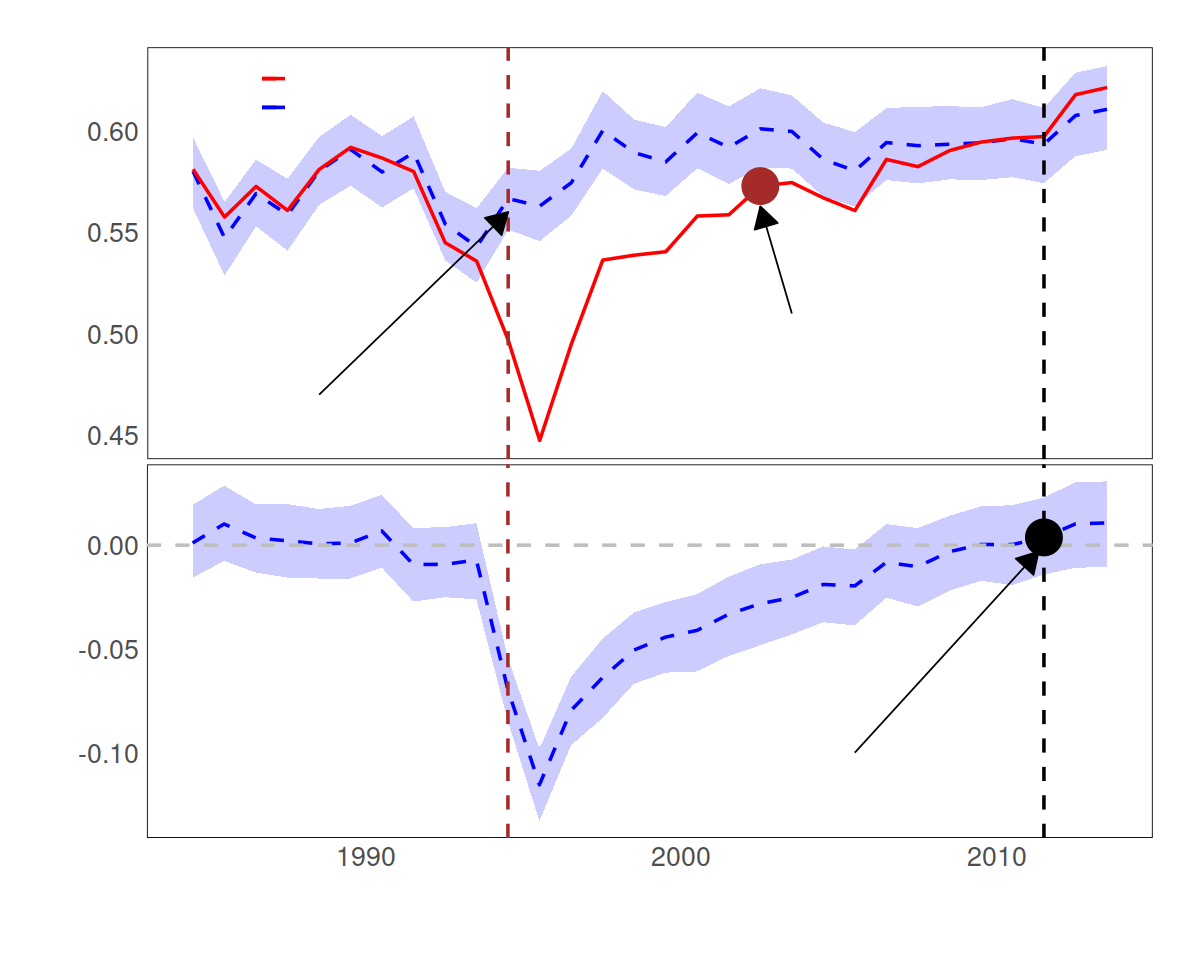

In [25]:
options(
  repr.plot.width = 10,     # Width of the plot
  repr.plot.height = 8    # Height of the plot
)
gg1 <- ggplot() +
  geom_line(aes(x = t, y = pred, color = "Prediction"), size = 1, linetype = "dashed") +
  geom_ribbon(aes(x = t, ymin = pred.lower, ymax = pred.upper, fill = "Prediction"), alpha = 0.2) +
  geom_line(aes(x = t, y = response, color = "Actual"), size = 1) +
  labs(
    x = "",
    y = ""
  ) +
  scale_color_manual(
    values = c("Prediction" = "blue", "Actual" = "red"),
    labels = c("",""),

  ) +
  scale_fill_manual(
    values = c("Prediction" = "blue"),
    guide = FALSE
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = NA),
    # panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 16),        # Font size for tick labels
    axis.text.x = element_blank(),
    axis.title = element_text(size = 22),
    legend.position = c(.13,.90),  # Move the legend to the bottom
    legend.background = element_rect(fill = "white", color = "black"),  # Legend background color and border
    legend.box = "horizontal",  # Arrange legend items horizontally,
    legend.text = element_text(size = 16,face="bold"),
    legend.title = element_blank(),
    plot.margin=unit(c(1,1,-0.5,1), "cm")
  ) 
  gg1 = gg1+theme(legend.background = element_blank())
  gg1 <- gg1 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1) +
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1) +
  geom_segment(
    aes(x = as.Date("1988-07-01"), xend = as.Date("1994-07-01"), y = .47, yend = .56),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) +
  # annotate("text", x = as.Date("1987-07-01"), y = .45, label = "Distrubance(1994)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7,face="bold")+
  geom_segment(
  aes(x = as.Date("2003-07-01"), xend = as.Date("2002-07-01"), y = .51, yend = response[19]-0.01),
  arrow = arrow(type = "closed", length = unit(0.2, "inches")),
  lineend = "butt",
  color = "black"
  ) 
  # annotate("text", x = as.Date("2004-07-01"), y = .45, label = "Recovered to mean NDVI\n before disturbance (2002) ", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)

  gg1 = gg1+geom_point(aes(x = as.Date("2002-07-01"), y = response[19]),color = "brown",
  show.legend = FALSE, size = 8,stroke=2)
   

gg2 <- ggplot() +
  geom_line(aes(x=t,y = point.effect), color = "blue", size = 1,linetype="dashed") +
  geom_ribbon(aes(t,ymin=point.effect.lower,ymax=point.effect.upper),fill="blue",alpha=0.2)+
  # geom_line(aes(x=t,y = response), color = "red", size = 1) +
  labs(
    x = "",
    y = ""
  ) + theme_minimal() + theme(panel.background = element_rect(fill = "white"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
  , axis.text = element_text(size = 16),        # Font size for tick labels
    axis.title = element_text(size = 22),plot.margin=unit(c(-.33,1,1,.8), "cm") )  # Remove gridlines
gg2 <- gg2 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1)+
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1)+
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray",size=1) + geom_point(aes(x = as.Date("2011-07-01"), y = point.effect[28]),color = "black",
  show.legend = FALSE, size = 8,stroke=2) +
  geom_segment(
    aes(x = as.Date("2005-07-01"), xend = as.Date("2011-05-01"), y = -0.1, yend = -.003),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) 
  # annotate("text", x = as.Date("2004-05-2"), y = -.16, label = "Recovered to counterfactual\n state(2011)", vjust = -0.5, hjust = 0.46, color = "black",
  # size=7)


combined_plot <- grid.arrange(gg1, gg2, nrow = 2)
combined_plot
ggsave("../manuscript/figures/recovery.png", plot = combined_plot,width = 10, height = 8, dpi = 300)

Don't know how to automatically pick scale for object of type <zoo>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <zoo>. Defaulting
to continuous.


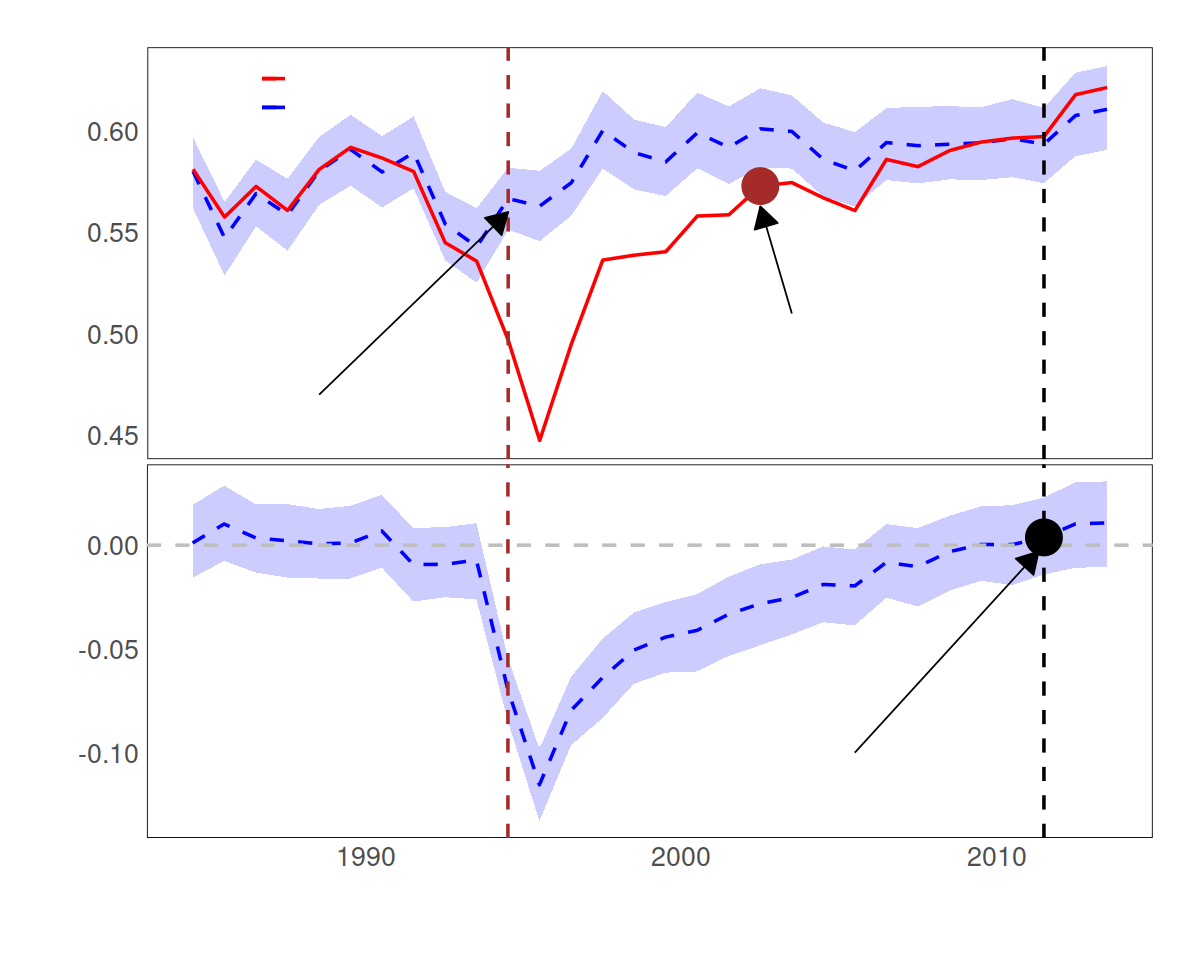

In [26]:
library(ggplot2)
library(gridExtra)

gg1 <- ggplot() +
  geom_line(aes(x = t, y = pred, color = "Prediction"), size = 1, linetype = "dashed") +
  geom_ribbon(aes(x = t, ymin = pred.lower, ymax = pred.upper, fill = "Prediction"), alpha = 0.2) +
  geom_line(aes(x = t, y = response, color = "Actual"), size = 1) +
  labs(
    x = "",
    y = ""
  ) +
  scale_color_manual(
    values = c("Prediction" = "blue", "Actual" = "red"),
    labels = c("",""),
  ) +
  scale_fill_manual(
    values = c("Prediction" = "blue"),
    guide = FALSE
  ) +
  theme_minimal() +
  theme(
    panel.background = element_rect(fill = NA),  # Set background to transparent
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 16),        # Font size for tick labels
    axis.text.x = element_blank(),
    axis.title = element_text(size = 22),
    legend.position = c(.13,.90),  # Move the legend to the bottom
    legend.background = element_blank(),  # Remove legend background
    legend.box = "horizontal",  # Arrange legend items horizontally
    legend.text = element_text(size = 16, face="bold"),
    legend.title = element_blank(),
    plot.margin=unit(c(1,1,-0.5,1), "cm")
  )

gg1 <- gg1 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1) +
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1) +
  geom_segment(
    aes(x = as.Date("1988-07-01"), xend = as.Date("1994-07-01"), y = .47, yend = .56),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) +
  geom_segment(
    aes(x = as.Date("2003-07-01"), xend = as.Date("2002-07-01"), y = .51, yend = response[19]-0.01),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  ) +
  geom_point(aes(x = as.Date("2002-07-01"), y = response[19]),color = "brown",
             show.legend = FALSE, size = 8,stroke=2)

gg2 <- ggplot() +
  geom_line(aes(x=t,y = point.effect), color = "blue", size = 1,linetype="dashed") +
  geom_ribbon(aes(t,ymin=point.effect.lower,ymax=point.effect.upper),fill="blue",alpha=0.2) +
  labs(
    x = "",
    y = ""
  ) + 
  theme_minimal() + 
  theme(
    panel.background = element_rect(fill = NA),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 16),        # Font size for tick labels
    axis.title = element_text(size = 22),
    plot.margin=unit(c(-.33,1,1,.8), "cm") 
  )

gg2 <- gg2 +
  geom_vline(xintercept = as.Date("1994-07-01"), linetype = "dashed", color = "brown",size=1) +
  geom_vline(xintercept = as.Date("2011-07-01"), linetype = "dashed", color = "black",size=1) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray",size=1) + 
  geom_point(aes(x = as.Date("2011-07-01"), y = point.effect[28]),color = "black",
             show.legend = FALSE, size = 8,stroke=2) +
  geom_segment(
    aes(x = as.Date("2005-07-01"), xend = as.Date("2011-05-01"), y = -0.1, yend = -.003),
    arrow = arrow(type = "closed", length = unit(0.2, "inches")),
    lineend = "butt",
    color = "black"
  )

combined_plot <- grid.arrange(gg1, gg2, nrow = 2)

# Add theme to make the background transparent
combined_plot <- combined_plot + theme(legend.background = element_blank(), panel.background = element_rect(fill = NA))

# Save the plot
ggsave("../manuscript/figures/recovery.png", plot = combined_plot, width = 10, height = 8, dpi = 300)


In [ ]:
paste("The actual NDVI in 2002 is:",response["2002-07-01"])
paste("The predicted NDVI in 2002 is:",pred["2002-07-01"])
paste("Difference:",pred["2002-07-01"]-response["2002-07-01"])


In [ ]:
set.seed(15)
t <- seq.Date(as.Date("1984-07-01"), by = "years", length.out = 30)
data <- zoo(ndvi_1994_mean, t)
pre.period <- as.Date(c("1984-07-01", "1993-07-01"))
post.period <- as.Date(c("1994-07-01", "2013-07-01"))
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
print(summary(impact))

In [ ]:
zscore <- function(data,std){
    (abs(data-mean(data))/sd(data))
}
res_na <- apply(res, 1, function(row) all(is.na(row)))
res_no_nan =res[res_na==FALSE,] 
sig = res_no_nan[,5]<0.01
sig_rel = res_no_nan[sig,4]
sig_rel_clean = sig_rel[(zscore(sig_rel)<3)]
hist(sig_rel_clean*100)